1. Посмотреть, какие признаки больше всего влияют на предсказение первого класса в датасете Wine. Используя RandomForestClassifier с параметрами ( n_estimators=1000, max_features=10, random_state=0)

In [96]:
from sklearn.datasets import load_wine
from sklearn.ensemble.forest import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Загрузим винца 
wine_dataset = load_wine()
#Взглянем на признаки
features= wine_dataset['feature_names']
print("Признаки:\n{}".format(wine_dataset['feature_names']))

Признаки:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [97]:
print("Классы: {}".format(wine_dataset['target_names']))

Классы: ['class_0' 'class_1' 'class_2']


In [101]:
forest = # Тут класс для обучения

forest.fit # Функция для тренировки 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [67]:
importances = forest.feature_importances_
importances

array([0.07622652, 0.0087497 , 0.00565479, 0.00861587, 0.01150571,
       0.01161219, 0.2386933 , 0.00099869, 0.00448452, 0.21459061,
       0.02815898, 0.13242978, 0.25827935])

In [68]:
indices = np.argsort(importances)[::-1]
# Выведем индексы важных признаков
num_to_plot = 10
feature_indices = [ind for ind in indices[:num_to_plot]]
feature_indices

[12, 6, 9, 11, 0, 10, 5, 4, 1, 3]

In [69]:
for f in range(num_to_plot):
    print(features[feature_indices[f]])

proline
flavanoids
color_intensity
od280/od315_of_diluted_wines
alcohol
hue
total_phenols
magnesium
malic_acid
alcalinity_of_ash


In [70]:
# Выведем важность признаков по строчно
print("Feature ranking:")
for f in range(num_to_plot):
    print("%d. %s %f " % (f+1, features[feature_indices[f]], importances[indices[f]]))
    

Feature ranking:
1. proline 0.258279 
2. flavanoids 0.238693 
3. color_intensity 0.214591 
4. od280/od315_of_diluted_wines 0.132430 
5. alcohol 0.076227 
6. hue 0.028159 
7. total_phenols 0.011612 
8. magnesium 0.011506 
9. malic_acid 0.008750 
10. alcalinity_of_ash 0.008616 


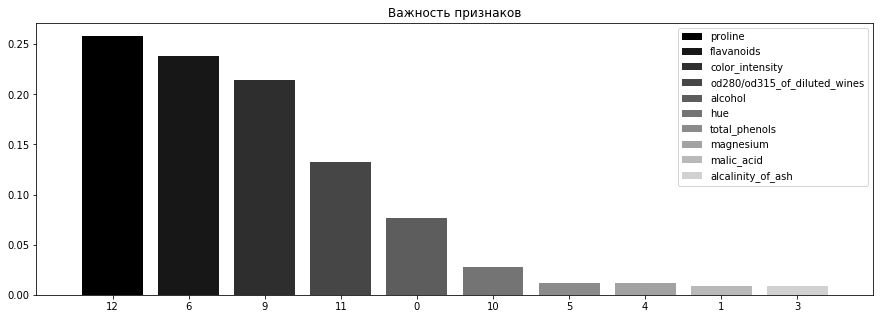

In [73]:
 
plt.figure(figsize=(15,5))
plt.title(u"Важность признаков")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) 
                  for i in feature_indices]);

2.  Модернезируйте код, для просмотра того, как на класс class_2 влияют признаки